In [3]:
import pandas as pd

df = pd.read_csv('pause_fluxes.csv')
print(df)

        Pause Before  Size  Left Span  Right Span  Weight  RL Ratio  WS Ratio
0               2589     1          1           1       1  1.000000  1.000000
1               2074     1          1           1       1  1.000000  1.000000
2               3557     1          1           1       1  1.000000  1.000000
3                281     2          2           1       1  0.500000  0.500000
4               1997     3          3           1       1  0.333333  0.333333
...              ...   ...        ...         ...     ...       ...       ...
118508           203     3          3           1       1  0.333333  0.333333
118509           530     2          1           2       1  2.000000  0.500000
118510           343     2          2           2       2  1.000000  1.000000
118511          4243     3          3           2       2  0.666667  0.666667
118512          2028     1          1           1       1  1.000000  1.000000

[118513 rows x 7 columns]


In [5]:
from sklearn.preprocessing import StandardScaler

features = ['Size', 'Left Span', 'Right Span',  'Weight',  'RL Ratio',  'WS Ratio']
x = df.loc[:, features].values
y = df.loc[:,['Pause Before']].values

x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [14]:
finalDf = pd.concat([principalDf, df[['Pause Before']]], axis = 1)
print(finalDf)

        principal component 1  principal component 2  principal component 3  \
0                   -2.493327               0.400959              -0.494729   
1                   -2.493327               0.400959              -0.494729   
2                   -2.493327               0.400959              -0.494729   
3                   -1.200654              -0.728857               0.911114   
4                   -0.304989              -1.352887               1.416821   
...                       ...                    ...                    ...   
118508              -0.304989              -1.352887               1.416821   
118509              -1.036690               1.345778               1.189872   
118510              -0.845845               0.374267              -1.436191   
118511               0.248324              -0.502656              -0.480416   
118512              -2.493327               0.400959              -0.494729   

        Pause Before  
0               2589  
1    

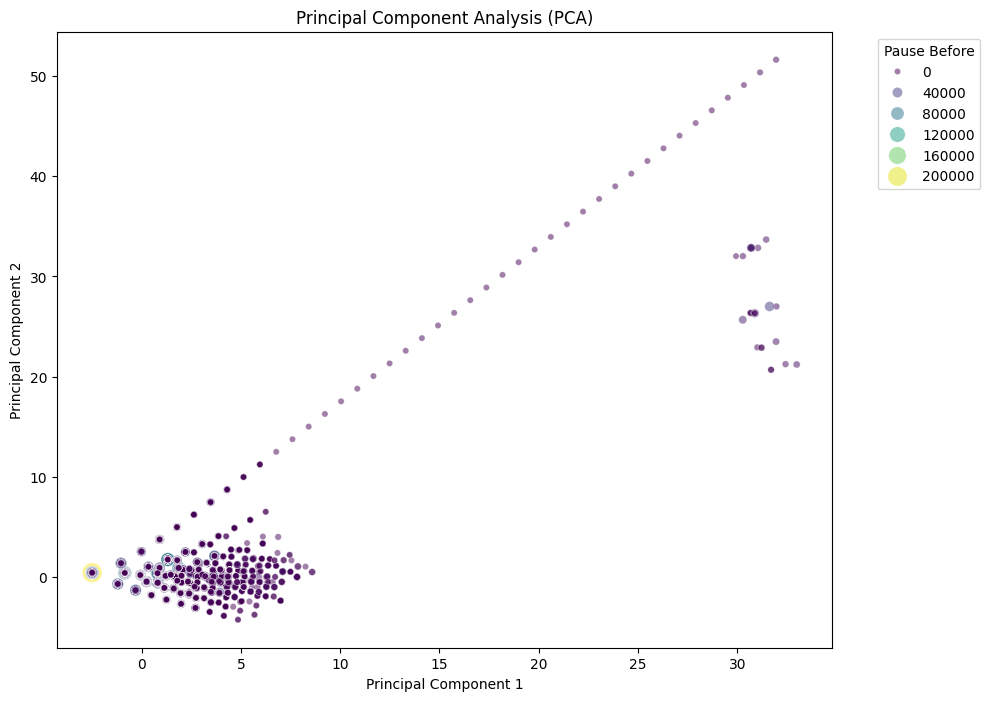

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming finalDf is your DataFrame
plt.figure(figsize=(10, 8))

# Using seaborn to create a scatter plot and color by 'Pause Before'
sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='Pause Before', palette='viridis', size='Pause Before', sizes=(20, 200), alpha=0.5)

plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Pause Before', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
pca.explained_variance_ratio_

array([0.48548937, 0.28457776, 0.18797782])

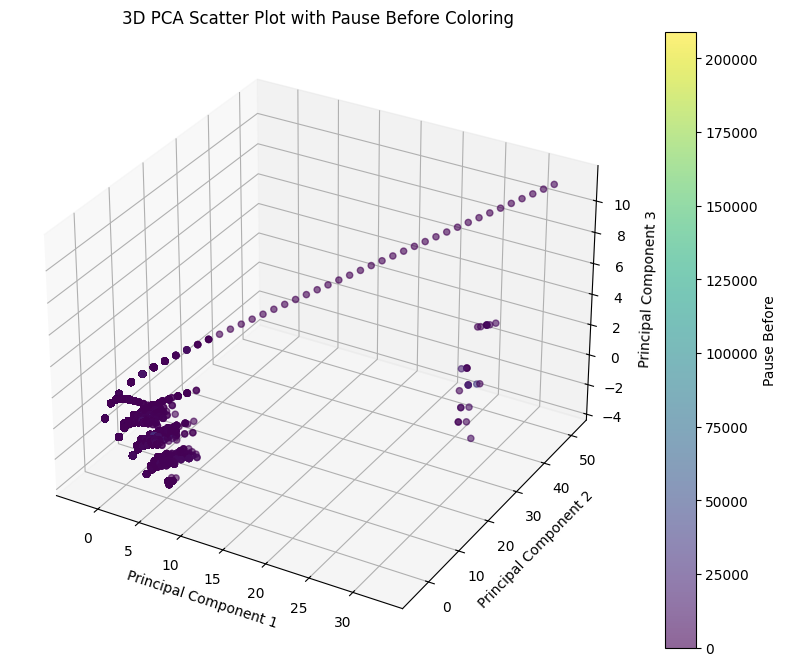

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
# Coloring the points by the 'Pause Before' values
img = ax.scatter(xs=finalDf['principal component 1'], ys=finalDf['principal component 2'], zs=finalDf['principal component 3'], c=finalDf['Pause Before'], cmap='viridis', alpha=0.6)

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Scatter Plot with Pause Before Coloring')

# Adding a color bar to understand the coloring
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Pause Before')

plt.show()